In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Reading and Understanding the data

In [2]:
Bike_data = pd.read_csv("day.csv")

In [3]:
Bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
Bike_data.shape

(730, 16)

In [5]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Exploratory Data analysis

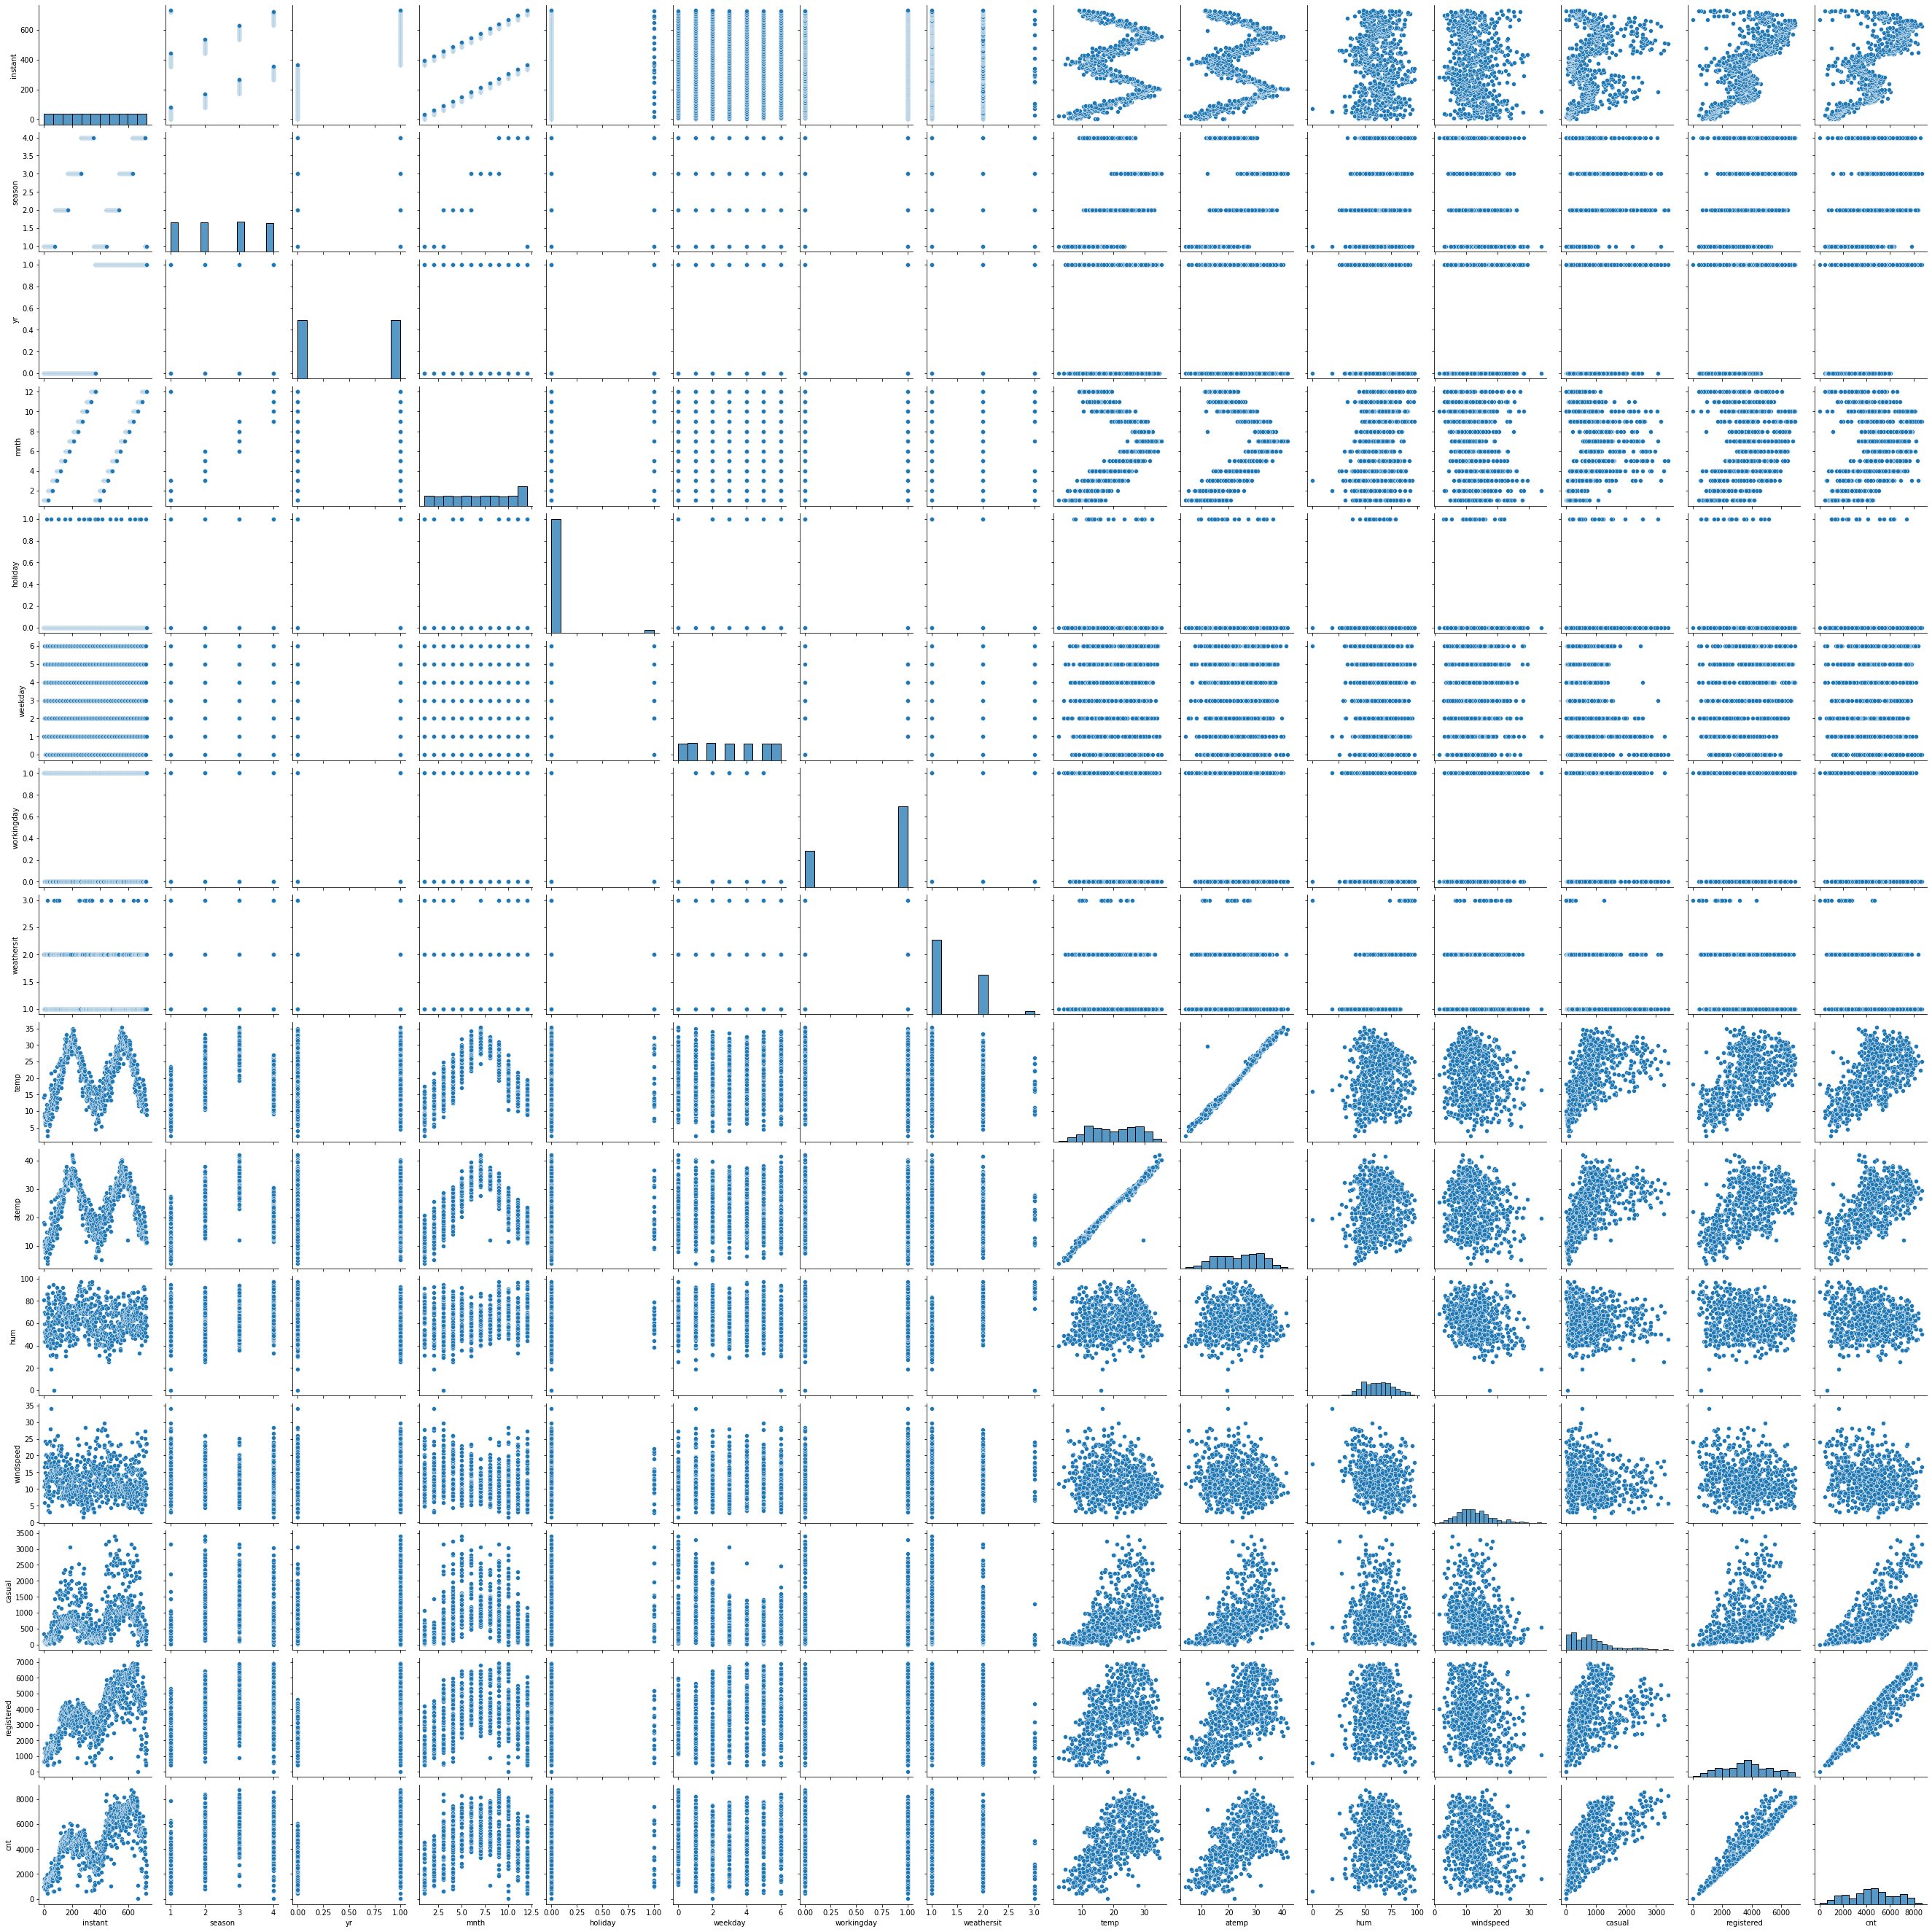

In [90]:
sns.pairplot(Bike_data)
plt.show()

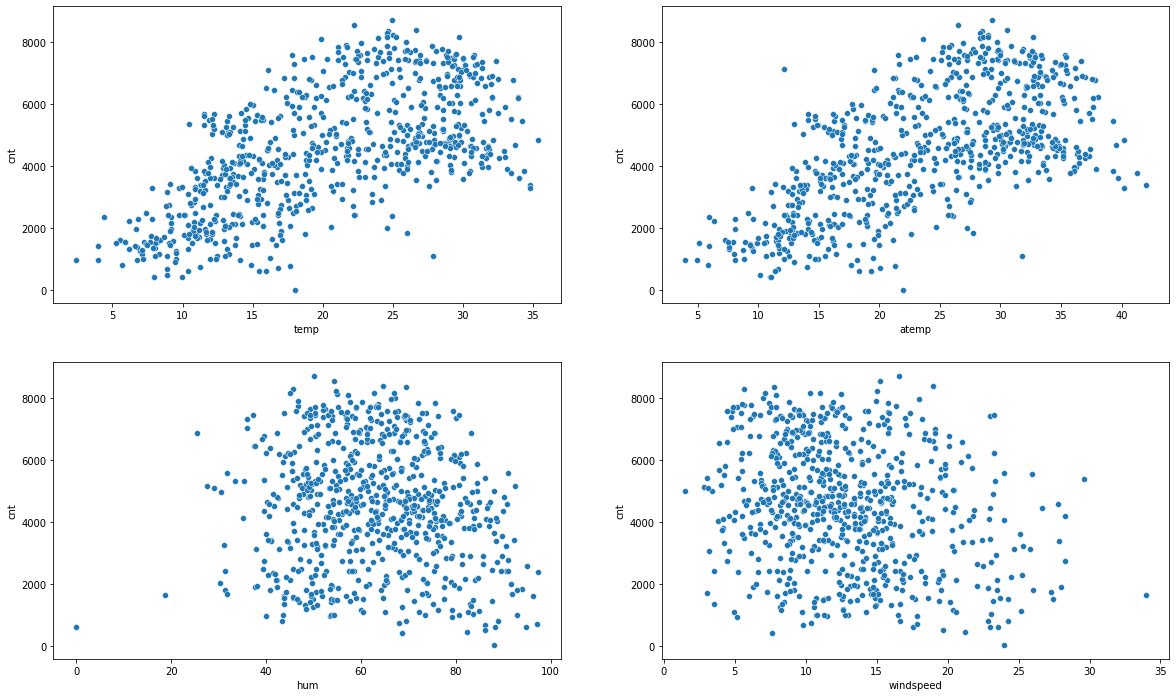

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.scatterplot(x = 'temp', y = 'cnt', data = Bike_data)
plt.subplot(2,2,2)
sns.scatterplot(x = 'atemp', y = 'cnt', data = Bike_data)
plt.subplot(2,2,3)
sns.scatterplot(x = 'hum', y = 'cnt', data = Bike_data)
plt.subplot(2,2,4)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = Bike_data)
plt.show()

#### From the above graph we can find some kind of linear relationship between the variables and target. Let find the pattern for categorical variables.


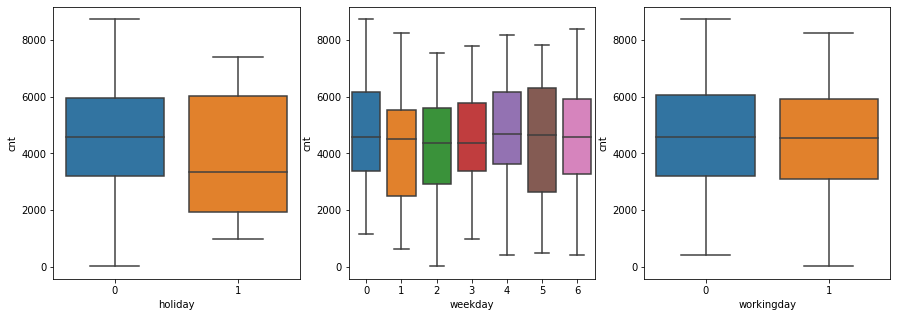

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_data)
plt.subplot(1,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_data)
plt.show()

#### From the above plot we can say that these categorical variables have significant effect on the target variable.

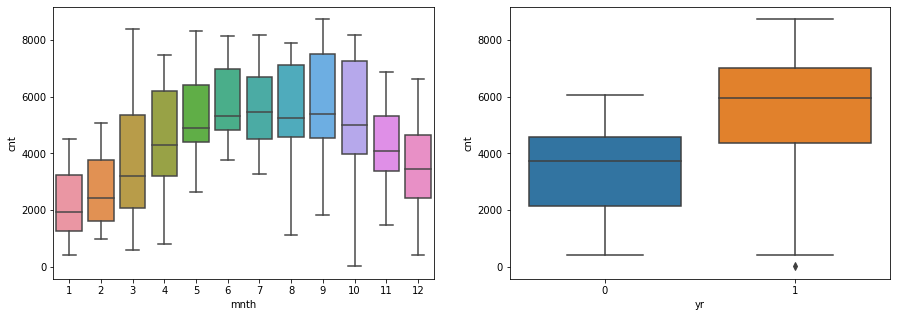

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_data)
plt.show()

#### Lets rename the column names.

#### Renaming column names.

In [10]:
Bike_data.rename(columns = {'yr' : 'year', 'mnth' : 'month', 'hum' : 'humidity', 'temp' : 'temparature'}, inplace = True)

In [11]:
Bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Now lets map the categorical variables. As given in problem statement we will frist change the values of 'Season' and 'Weather'.
#### Seasons

In [12]:
seasons = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
Bike_data['season'] = [seasons[item] for item in Bike_data['season']]

In [13]:
Bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Similarly for 'weathersit'

In [14]:
weather = {1:'clear', 2:'cloudy', 3:'light rain', 4:'heavy rain'}
Bike_data['weathersit'] = [weather[item] for item in Bike_data['weathersit']]

In [15]:
Bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### lets check the inference of season and weather with target variable.

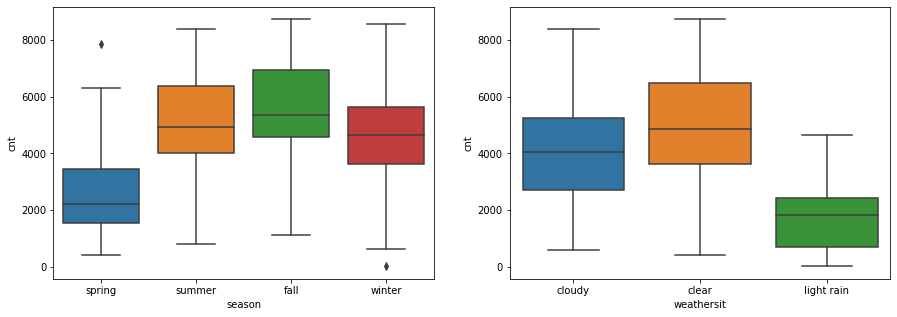

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_data)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_data)
plt.show()

### Inferences
#### - People mostly rented the bikes during Fall season
#### - Most of the bikes are rented when the weather is "Clear".

#### Lets rename the year and month labels also.

In [17]:
Year = {0:'2018', 1:'2019'}
Month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
Bike_data['year'] = [Year[item] for item in Bike_data['year']]
Bike_data['month'] = [Month[item] for item in Bike_data['month']]


In [18]:
Bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Lets draw the inference monthly and yearly.

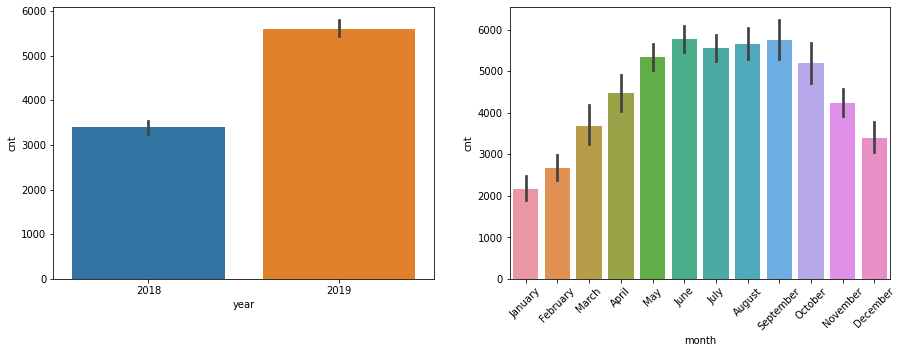

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'year', y = 'cnt', data = Bike_data)
plt.subplot(1,2,2)
sns.barplot(x = 'month', y = 'cnt', data = Bike_data)
plt.xticks(rotation=45)
plt.show()

### Inference
#### - The demand for the rented bikes have been increased in the year 2019 compared to 2018.
#### - The company sales have been increased gradually and reached the highest rate from June to September and September as high sales.

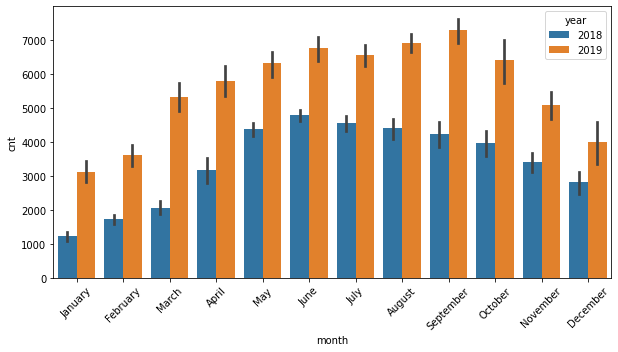

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'month', y = 'cnt',hue = 'year', data = Bike_data)
plt.xticks(rotation=45)
plt.show()

#### Lets rename for week days.

In [21]:
week = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Satuarday'}
Bike_data['weekday'] = [week[item] for item in Bike_data['weekday']]

In [22]:
Bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,January,0,Monday,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,January,0,Tuesday,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


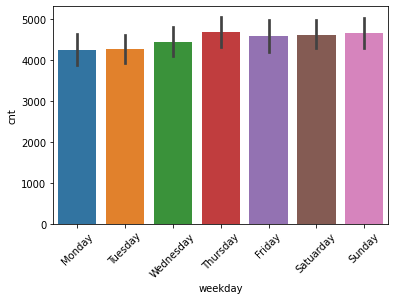

In [23]:
sns.barplot(x = 'weekday', y = 'cnt', data = Bike_data)
plt.xticks(rotation=45)
plt.show()

#### Lets find the correlation between the variables.

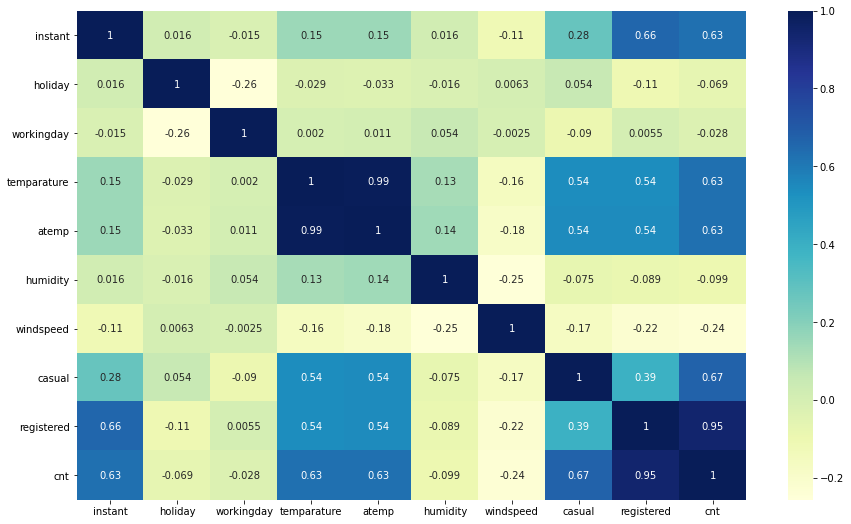

In [24]:
plt.figure(figsize = (15, 9))
sns.heatmap(Bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Lets remove the unwanted columns and then correlate.
#### Here as we have "cnt" variable we can remove "casual" and "Registered" variables.
#### And for modelling we dont need 'Instant' variable also.
#### We can remove the dteday also as it is not shown in correlation.

In [25]:
columns_remove = ['casual', 'registered', 'instant', 'dteday']
Bike_data = Bike_data.drop(columns = columns_remove, axis=1)

In [26]:
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temparature,atemp,humidity,windspeed,cnt
0,spring,2018,January,0,Monday,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


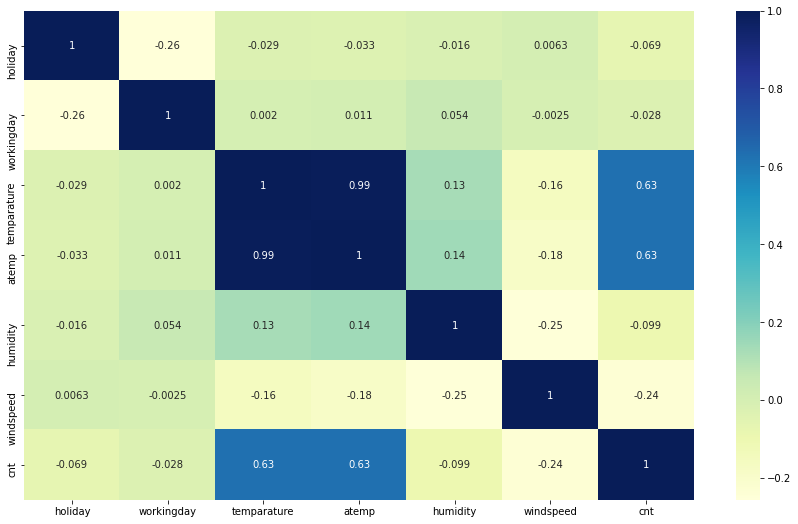

In [27]:
plt.figure(figsize = (15, 9))
sns.heatmap(Bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the above heatmap we can see that the variables "Temparature" and "atemp" are highly correlated with a value of '0.99" which is almost equal to 1. So it is better to remove any of the column.
#### As we know Temparature is important variable we will remove "atemp" column.
#### The variables 'cnt' and 'Temparature' and 'atemp' are significantly high correlation.

In [28]:
Bike_data = Bike_data.drop(columns='atemp', axis=1)

In [29]:
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temparature,humidity,windspeed,cnt
0,spring,2018,January,0,Monday,1,cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,1,cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,clear,9.305237,43.6957,12.522300,1600


#### Now lets prepare the data.
### Data preparation

#### We will first create the dummy variables for categorical variables.

In [30]:
seasons = pd.get_dummies(Bike_data['season'], prefix = 'Season', drop_first = True)

In [31]:
seasons.head()

,Season_spring,Season_summer,Season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Similarly lets egt dummies for the remaining variables also.

In [32]:
weather = pd.get_dummies(Bike_data['weathersit'], prefix = 'Weather', drop_first = True)
weekday = pd.get_dummies(Bike_data['weekday'], prefix = 'Weekday', drop_first = True)
month = pd.get_dummies(Bike_data['month'], prefix = 'Month', drop_first = True)
year = pd.get_dummies(Bike_data['year'], prefix = 'Year', drop_first = True)

#### Lets combine both the data frames

In [33]:
Bike = pd.concat([seasons,weather,weekday,month,year], axis=1)

In [34]:
Bike.head()

,Season_spring,Season_summer,Season_winter,Weather_cloudy,Weather_light rain,Weekday_Monday,Weekday_Satuarday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
0,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [35]:
Bike_data = pd.concat([Bike_data,Bike], axis = 1)

In [36]:
Bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temparature,humidity,windspeed,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
0,spring,2018,January,0,Monday,1,cloudy,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,0
1,spring,2018,January,0,Tuesday,1,cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,0,0,0,0
2,spring,2018,January,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,1,0,0,0,0,0,0,0,0
3,spring,2018,January,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,1,0,0,0,0,0,0,0,0
4,spring,2018,January,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,1,0,0,0,0,0,0,0,0


In [37]:
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              730 non-null    object 
 1   year                730 non-null    object 
 2   month               730 non-null    object 
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    object 
 5   workingday          730 non-null    int64  
 6   weathersit          730 non-null    object 
 7   temparature         730 non-null    float64
 8   humidity            730 non-null    float64
 9   windspeed           730 non-null    float64
 10  cnt                 730 non-null    int64  
 11  Season_spring       730 non-null    uint8  
 12  Season_summer       730 non-null    uint8  
 13  Season_winter       730 non-null    uint8  
 14  Weather_cloudy      730 non-null    uint8  
 15  Weather_light rain  730 non-null    uint8  
 16  Weekday_

#### Now lets remove the Original columns.

In [38]:
Bike_data.drop(['season', 'month', 'weekday', 'weathersit', 'year'], axis = 1, inplace = True)

In [39]:
Bike_data.head()

,holiday,workingday,temparature,humidity,windspeed,cnt,Season_spring,Season_summer,Season_winter,Weather_cloudy,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
Bike_data.shape

(730, 29)

### Model Buliding
#### Train-Test split

In [41]:
np.random.seed(0)
Bike_train, Bike_test = train_test_split(Bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
print(Bike_train.shape)
print(Bike_test.shape)

(510, 29)
(219, 29)


### Scaling
#### Now we will perform scaling to the train data set.

In [43]:
scaler = MinMaxScaler()

In [44]:
Bike_train.head()

,holiday,workingday,temparature,humidity,windspeed,cnt,Season_spring,Season_summer,Season_winter,Weather_cloudy,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
653,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
576,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0,0,16.980847,62.1250,10.792293,4066,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0,0,15.443347,48.9583,8.708325,4220,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
num_vars = ['temparature', 'humidity', 'windspeed', 'cnt']
Bike_train[num_vars] = scaler.fit_transform(Bike_train[num_vars])

In [46]:
Bike_train.head()

,holiday,workingday,temparature,humidity,windspeed,cnt,Season_spring,Season_summer,Season_winter,Weather_cloudy,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:
Bike_train.describe()

,holiday,workingday,temparature,humidity,windspeed,cnt,Season_spring,Season_summer,Season_winter,Weather_cloudy,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Year_2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,...,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.507843
std,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,...,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### From above we can make that the values are inbetween 0 and 1.
#### Now lets divide data into X_train and y_train.

In [48]:
y_train = Bike_train.pop('cnt')
X_train = Bike_train

### Model Building using single variable.
#### First we will add constant to the equation.

In [49]:
X_train_lm = sm.add_constant(X_train[['temparature']])

#### Lets create the first fitted model.

In [50]:
lr = sm.OLS(y_train, X_train_lm).fit()

In [51]:
lr.params

const          0.169798
temparature    0.639952
dtype: float64

In [52]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.80e-61
Time:                        11:52:52   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1698      0.020      8.628      0.000       0.131       0.208
temparature     0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From above we can find the following inferences:
#### R-Square is 41%which is not so low.
#### P-values are also significant.
#### Lets add another variable.

In [53]:
X_train_lm = X_train[['temparature','humidity']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const          0.320358
temparature    0.665293
humidity      -0.252434
dtype: float64

In [54]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.25e-64
Time:                        11:53:04   Log-Likelihood:                 186.52
No. Observations:                 510   AIC:                            -367.0
Df Residuals:                     507   BIC:                            -354.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3204      0.036      8.803      0.000       0.249       0.392
temparature     0.6653      0.033     19.891      0.000       0.600       0.731
humidity       -0.2524      0.052     -4.875      0.000      -0.354      -0.151
==============================================================================
Omnibus:                        4.255   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.383
Skew:                           0.086   Prob(JB):                        0.184
Kurtosis:                       2.640   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inferences:
#### The coefficient of humidity is negative which menas as humidity increases demand decreases.
#### And R-square has been increased from 41% to 44%.
#### P-values are still significant.

#### As it is time taking we will now add all the columns and check for inferences and move furtehr analysis.

In [55]:
X_train_lm = X_train.columns
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 0.394543
holiday              -0.135424
workingday           -0.060524
temparature           0.445458
humidity             -0.157315
windspeed            -0.183046
Season_spring        -0.043705
Season_summer         0.042243
Season_winter         0.110897
Weather_cloudy       -0.059355
Weather_light rain   -0.251511
Weekday_Monday       -0.024633
Weekday_Satuarday    -0.056319
Weekday_Sunday       -0.049961
Weekday_Thursday      0.003863
Weekday_Tuesday      -0.026299
Weekday_Wednesday    -0.011241
Month_August          0.021507
Month_December       -0.045669
Month_February       -0.037279
Month_January        -0.063612
Month_July           -0.034910
Month_June            0.000975
Month_March           0.000608
Month_May             0.024064
Month_November       -0.041555
Month_October         0.005790
Month_September       0.086055
Year_2019             0.230857
dtype: float64

In [56]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.33e-179
Time:                        11:53:29   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3945      0.085      4.640      0.000       0.227       0.562
holiday               -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday            -0.0605      0.071     -0.852      0.395      -0.200       0.079
temparature            0.4455      0.047      9.513      0.000       0.353       0.537
humidity              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed             -0.1830      0.026     -7.036      0.000      -0.234      -0.132
Season_spring         -0.0437      0.030     -1.444      0.149      -0.103       0.016
Season_summer          0.0422      0.026      1.598      0.111      -0.010       0.094
Season_winter          0.1109      0.028      3.938      0.000       0.056       0.166
Weather_cloudy        -0.0594      0.011     -5.637      0.000      -0.080      -0.039
Weather_light rain    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
Weekday_Monday        -0.0246      0.015     -1.690      0.092      -0.053       0.004
Weekday_Satuarday     -0.0563      0.072     -0.787      0.432      -0.197       0.084
Weekday_Sunday        -0.0500      0.071     -0.699      0.485      -0.190       0.091
Weekday_Thursday       0.0039      0.015      0.258      0.796      -0.026       0.033
Weekday_Tuesday       -0.0263      0.015     -1.792      0.074      -0.055       0.003
Weekday_Wednesday     -0.0112      0.015     -0.736      0.462      -0.041       0.019
Month_August           0.0215      0.034      0.632      0.527      -0.045       0.088
Month_December        -0.0457      0.034     -1.348      0.178      -0.112       0.021
Month_February        -0.0373      0.033     -1.121      0.263      -0.103       0.028
Month_January         -0.0636      0.034     -1.880      0.061      -0.130       0.003
Month_July            -0.0349      0.035     -0.985      0.325      -0.105       0.035
Month_June             0.0010      0.025      0.038      0.969      -0.049       0.051
Month_March            0.0006      0.025      0.025      0.980      -0.048       0.049
Month_May              0.0241      0.021      1.134      0.257      -0.018       0.066
Month_November        -0.0416      0.037     -1.133      0.258      -0.114       0.031
Month_October          0.0058      0.036      0.160      0.873      -0.065       0.077
Month_September        0.0861      0.032      2.667      0.008       0.023       0.149
Year_2019              0.2309      0.008     28.387      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):             

#### From the above model there are some variables with insignificant P-values. Lets drop those features.

In [57]:
X_train_1 = X_train_lm.drop(['Month_March'],axis=1)

In [58]:
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 0.394925
holiday              -0.135422
workingday           -0.060513
temparature           0.445267
humidity             -0.157239
windspeed            -0.183076
Season_spring        -0.043466
Season_summer         0.042118
Season_winter         0.111025
Weather_cloudy       -0.059359
Weather_light rain   -0.251506
Weekday_Monday       -0.024651
Weekday_Satuarday    -0.056313
Weekday_Sunday       -0.049949
Weekday_Thursday      0.003866
Weekday_Tuesday      -0.026310
Weekday_Wednesday    -0.011247
Month_August          0.021231
Month_December       -0.046195
Month_February       -0.037881
Month_January        -0.064232
Month_July           -0.035171
Month_June            0.000778
Month_May             0.023881
Month_November       -0.042033
Month_October         0.005330
Month_September       0.085726
Year_2019             0.230856
dtype: float64

In [59]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.24e-180
Time:                        11:53:52   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3949      0.084      4.729      0.000       0.231       0.559
holiday               -0.1354      0.065     -2.074      0.039      -0.264      -0.007
workingday            -0.0605      0.071     -0.853      0.394      -0.200       0.079
temparature            0.4453      0.046      9.653      0.000       0.355       0.536
humidity              -0.1572      0.039     -4.064      0.000      -0.233      -0.081
windspeed             -0.1831      0.026     -7.052      0.000      -0.234      -0.132
Season_spring         -0.0435      0.029     -1.519      0.130      -0.100       0.013
Season_summer          0.0421      0.026      1.625      0.105      -0.009       0.093
Season_winter          0.1110      0.028      4.016      0.000       0.057       0.165
Weather_cloudy        -0.0594      0.011     -5.643      0.000      -0.080      -0.039
Weather_light rain    -0.2515      0.027     -9.465      0.000      -0.304      -0.199
Weekday_Monday        -0.0247      0.015     -1.695      0.091      -0.053       0.004
Weekday_Satuarday     -0.0563      0.072     -0.788      0.431      -0.197       0.084
Weekday_Sunday        -0.0499      0.071     -0.699      0.485      -0.190       0.090
Weekday_Thursday       0.0039      0.015      0.259      0.796      -0.025       0.033
Weekday_Tuesday       -0.0263      0.015     -1.796      0.073      -0.055       0.002
Weekday_Wednesday     -0.0112      0.015     -0.737      0.461      -0.041       0.019
Month_August           0.0212      0.032      0.662      0.508      -0.042       0.084
Month_December        -0.0462      0.026     -1.762      0.079      -0.098       0.005
Month_February        -0.0379      0.022     -1.687      0.092      -0.082       0.006
Month_January         -0.0642      0.023     -2.852      0.005      -0.108      -0.020
Month_July            -0.0352      0.034     -1.041      0.298      -0.102       0.031
Month_June             0.0008      0.024      0.032      0.974      -0.046       0.048
Month_May              0.0239      0.020      1.204      0.229      -0.015       0.063
Month_November        -0.0420      0.031     -1.354      0.176      -0.103       0.019
Month_October          0.0053      0.031      0.173      0.863      -0.055       0.066
Month_September        0.0857      0.029      2.924      0.004       0.028       0.143
Year_2019              0.2309      0.008     28.416      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.874   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.108
Skew:                          -0.768   Prob(JB):                     3.92e-46
Kurtosis:                       5.735   Cond. No.                     

In [60]:
X_train_1 = X_train_lm.drop(['Month_October'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 0.396538
holiday              -0.135368
workingday           -0.060830
temparature           0.445771
humidity             -0.156603
windspeed            -0.182900
Season_spring        -0.044493
Season_summer         0.040393
Season_winter         0.113251
Weather_cloudy       -0.059416
Weather_light rain   -0.251408
Weekday_Monday       -0.024510
Weekday_Satuarday    -0.056552
Weekday_Sunday       -0.050237
Weekday_Thursday      0.003888
Weekday_Tuesday      -0.026313
Weekday_Wednesday    -0.011192
Month_August          0.019063
Month_December       -0.049394
Month_February       -0.038750
Month_January        -0.065067
Month_July           -0.037352
Month_June           -0.000256
Month_May             0.023486
Month_November       -0.046245
Month_September       0.083077
Year_2019             0.230791
dtype: float64

In [61]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.14e-181
Time:                        11:54:03   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -993.6
Df Residuals:                     483   BIC:                            -879.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3965      0.083      4.783      0.000       0.234       0.559
holiday               -0.1354      0.065     -2.076      0.038      -0.264      -0.007
workingday            -0.0608      0.071     -0.859      0.391      -0.200       0.078
temparature            0.4458      0.046      9.693      0.000       0.355       0.536
humidity              -0.1566      0.038     -4.070      0.000      -0.232      -0.081
windspeed             -0.1829      0.026     -7.058      0.000      -0.234      -0.132
Season_spring         -0.0445      0.028     -1.591      0.112      -0.099       0.010
Season_summer          0.0404      0.024      1.690      0.092      -0.007       0.087
Season_winter          0.1133      0.024      4.635      0.000       0.065       0.161
Weather_cloudy        -0.0594      0.011     -5.657      0.000      -0.080      -0.039
Weather_light rain    -0.2514      0.027     -9.473      0.000      -0.304      -0.199
Weekday_Monday        -0.0245      0.015     -1.690      0.092      -0.053       0.004
Weekday_Satuarday     -0.0566      0.071     -0.792      0.429      -0.197       0.084
Weekday_Sunday        -0.0502      0.071     -0.704      0.482      -0.190       0.090
Weekday_Thursday       0.0039      0.015      0.261      0.795      -0.025       0.033
Weekday_Tuesday       -0.0263      0.015     -1.798      0.073      -0.055       0.002
Weekday_Wednesday     -0.0112      0.015     -0.735      0.463      -0.041       0.019
Month_August           0.0191      0.029      0.647      0.518      -0.039       0.077
Month_December        -0.0494      0.019     -2.667      0.008      -0.086      -0.013
Month_February        -0.0387      0.022     -1.772      0.077      -0.082       0.004
Month_January         -0.0651      0.022     -2.961      0.003      -0.108      -0.022
Month_July            -0.0374      0.031     -1.194      0.233      -0.099       0.024
Month_June            -0.0003      0.023     -0.011      0.991      -0.046       0.045
Month_May              0.0235      0.020      1.193      0.233      -0.015       0.062
Month_November        -0.0462      0.019     -2.411      0.016      -0.084      -0.009
Month_September        0.0831      0.025      3.329      0.001       0.034       0.132
Year_2019              0.2308      0.008     28.467      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.278   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.284
Skew:                          -0.764   Prob(JB):                     1.61e-45
Kurtosis:                       5.715   Cond. No.                         70.0
==============================================================================

In [62]:
X_train_1 = X_train_lm.drop(['Month_June'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 0.396542
holiday              -0.135371
workingday           -0.060858
temparature           0.445500
humidity             -0.156546
windspeed            -0.182869
Season_spring        -0.044407
Season_summer         0.040441
Season_winter         0.113345
Weather_cloudy       -0.059421
Weather_light rain   -0.251409
Weekday_Monday       -0.024515
Weekday_Satuarday    -0.056575
Weekday_Sunday       -0.050262
Weekday_Thursday      0.003897
Weekday_Tuesday      -0.026312
Weekday_Wednesday    -0.011189
Month_August          0.019253
Month_December       -0.049422
Month_February       -0.038785
Month_January        -0.065121
Month_July           -0.037144
Month_May             0.023585
Month_November       -0.046261
Month_September       0.083214
Year_2019             0.230799
dtype: float64

In [63]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          3.90e-182
Time:                        11:54:17   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3965      0.083      4.788      0.000       0.234       0.559
holiday               -0.1354      0.065     -2.078      0.038      -0.263      -0.007
workingday            -0.0609      0.071     -0.860      0.390      -0.200       0.078
temparature            0.4455      0.039     11.488      0.000       0.369       0.522
humidity              -0.1565      0.038     -4.110      0.000      -0.231      -0.082
windspeed             -0.1829      0.026     -7.108      0.000      -0.233      -0.132
Season_spring         -0.0444      0.027     -1.655      0.099      -0.097       0.008
Season_summer          0.0404      0.023      1.722      0.086      -0.006       0.087
Season_winter          0.1133      0.023      4.959      0.000       0.068       0.158
Weather_cloudy        -0.0594      0.010     -5.670      0.000      -0.080      -0.039
Weather_light rain    -0.2514      0.027     -9.483      0.000      -0.303      -0.199
Weekday_Monday        -0.0245      0.014     -1.693      0.091      -0.053       0.004
Weekday_Satuarday     -0.0566      0.071     -0.793      0.428      -0.197       0.084
Weekday_Sunday        -0.0503      0.071     -0.706      0.481      -0.190       0.090
Weekday_Thursday       0.0039      0.015      0.262      0.794      -0.025       0.033
Weekday_Tuesday       -0.0263      0.015     -1.800      0.073      -0.055       0.002
Weekday_Wednesday     -0.0112      0.015     -0.735      0.463      -0.041       0.019
Month_August           0.0193      0.024      0.808      0.419      -0.028       0.066
Month_December        -0.0494      0.018     -2.696      0.007      -0.085      -0.013
Month_February        -0.0388      0.022     -1.795      0.073      -0.081       0.004
Month_January         -0.0651      0.021     -3.042      0.002      -0.107      -0.023
Month_July            -0.0371      0.025     -1.492      0.136      -0.086       0.012
Month_May              0.0236      0.017      1.348      0.178      -0.011       0.058
Month_November        -0.0463      0.019     -2.421      0.016      -0.084      -0.009
Month_September        0.0832      0.022      3.855      0.000       0.041       0.126
Year_2019              0.2308      0.008     28.619      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.293   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.411
Skew:                          -0.764   Prob(JB):                     1.51e-45
Kurtosis:                       5.716   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [64]:
X_train_1 = X_train_lm.drop(['Weekday_Thursday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                 0.398493
holiday              -0.135360
workingday           -0.060711
temparature           0.445279
humidity             -0.156795
windspeed            -0.182950
Season_spring        -0.044424
Season_summer         0.040658
Season_winter         0.113583
Weather_cloudy       -0.059505
Weather_light rain   -0.252062
Weekday_Monday       -0.026433
Weekday_Satuarday    -0.058335
Weekday_Sunday       -0.052044
Weekday_Tuesday      -0.028255
Weekday_Wednesday    -0.013103
Month_August          0.019483
Month_December       -0.049737
Month_February       -0.038613
Month_January        -0.065166
Month_July           -0.036700
Month_May             0.023693
Month_November       -0.046448
Month_September       0.083342
Year_2019             0.230866
dtype: float64

In [65]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          3.71e-183
Time:                        11:54:33   Log-Likelihood:                 523.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3985      0.082      4.836      0.000       0.237       0.560
holiday               -0.1354      0.065     -2.080      0.038      -0.263      -0.007
workingday            -0.0607      0.071     -0.859      0.391      -0.200       0.078
temparature            0.4453      0.039     11.496      0.000       0.369       0.521
humidity              -0.1568      0.038     -4.122      0.000      -0.232      -0.082
windspeed             -0.1830      0.026     -7.118      0.000      -0.233      -0.132
Season_spring         -0.0444      0.027     -1.657      0.098      -0.097       0.008
Season_summer          0.0407      0.023      1.734      0.083      -0.005       0.087
Season_winter          0.1136      0.023      4.978      0.000       0.069       0.158
Weather_cloudy        -0.0595      0.010     -5.686      0.000      -0.080      -0.039
Weather_light rain    -0.2521      0.026     -9.560      0.000      -0.304      -0.200
Weekday_Monday        -0.0264      0.012     -2.118      0.035      -0.051      -0.002
Weekday_Satuarday     -0.0583      0.071     -0.822      0.411      -0.198       0.081
Weekday_Sunday        -0.0520      0.071     -0.735      0.463      -0.191       0.087
Weekday_Tuesday       -0.0283      0.013     -2.245      0.025      -0.053      -0.004
Weekday_Wednesday     -0.0131      0.013     -0.983      0.326      -0.039       0.013
Month_August           0.0195      0.024      0.819      0.413      -0.027       0.066
Month_December        -0.0497      0.018     -2.722      0.007      -0.086      -0.014
Month_February        -0.0386      0.022     -1.790      0.074      -0.081       0.004
Month_January         -0.0652      0.021     -3.047      0.002      -0.107      -0.023
Month_July            -0.0367      0.025     -1.479      0.140      -0.085       0.012
Month_May              0.0237      0.017      1.356      0.176      -0.011       0.058
Month_November        -0.0464      0.019     -2.435      0.015      -0.084      -0.009
Month_September        0.0833      0.022      3.866      0.000       0.041       0.126
Year_2019              0.2309      0.008     28.669      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.598   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.793
Skew:                          -0.766   Prob(JB):                     7.56e-46
Kurtosis:                       5.726   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_1 = X_train_lm.drop(['Weekday_Sunday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.37e-184
Time:                        11:54:43   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3458      0.041      8.513      0.000       0.266       0.426
holiday               -0.0924      0.028     -3.244      0.001      -0.148      -0.036
workingday            -0.0097      0.013     -0.744      0.457      -0.035       0.016
temparature            0.4461      0.039     11.529      0.000       0.370       0.522
humidity              -0.1557      0.038     -4.098      0.000      -0.230      -0.081
windspeed             -0.1835      0.026     -7.144      0.000      -0.234      -0.133
Season_spring         -0.0441      0.027     -1.646      0.100      -0.097       0.009
Season_summer          0.0407      0.023      1.739      0.083      -0.005       0.087
Season_winter          0.1133      0.023      4.970      0.000       0.069       0.158
Weather_cloudy        -0.0595      0.010     -5.687      0.000      -0.080      -0.039
Weather_light rain    -0.2519      0.026     -9.558      0.000      -0.304      -0.200
Weekday_Monday        -0.0259      0.012     -2.078      0.038      -0.050      -0.001
Weekday_Satuarday     -0.0074      0.015     -0.487      0.626      -0.037       0.023
Weekday_Tuesday       -0.0274      0.013     -2.189      0.029      -0.052      -0.003
Weekday_Wednesday     -0.0118      0.013     -0.893      0.373      -0.038       0.014
Month_August           0.0191      0.024      0.805      0.421      -0.028       0.066
Month_December        -0.0495      0.018     -2.710      0.007      -0.085      -0.014
Month_February        -0.0382      0.022     -1.773      0.077      -0.081       0.004
Month_January         -0.0649      0.021     -3.038      0.003      -0.107      -0.023
Month_July            -0.0371      0.025     -1.496      0.135      -0.086       0.012
Month_May              0.0234      0.017      1.339      0.181      -0.011       0.058
Month_November        -0.0477      0.019     -2.512      0.012      -0.085      -0.010
Month_September        0.0835      0.022      3.874      0.000       0.041       0.126
Year_2019              0.2312      0.008     28.775      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.045
Skew:                          -0.771   Prob(JB):                     4.92e-45
Kurtosis:                       5.687   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.37e-184
Time:                        11:54:52   Log-Likelihood:                 523.47
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     486   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3458      0.041      8.513      0.000       0.266       0.426
holiday               -0.0924      0.028     -3.244      0.001      -0.148      -0.036
workingday            -0.0097      0.013     -0.744      0.457      -0.035       0.016
temparature            0.4461      0.039     11.529      0.000       0.370       0.522
humidity              -0.1557      0.038     -4.098      0.000      -0.230      -0.081
windspeed             -0.1835      0.026     -7.144      0.000      -0.234      -0.133
Season_spring         -0.0441      0.027     -1.646      0.100      -0.097       0.009
Season_summer          0.0407      0.023      1.739      0.083      -0.005       0.087
Season_winter          0.1133      0.023      4.970      0.000       0.069       0.158
Weather_cloudy        -0.0595      0.010     -5.687      0.000      -0.080      -0.039
Weather_light rain    -0.2519      0.026     -9.558      0.000      -0.304      -0.200
Weekday_Monday        -0.0259      0.012     -2.078      0.038      -0.050      -0.001
Weekday_Satuarday     -0.0074      0.015     -0.487      0.626      -0.037       0.023
Weekday_Tuesday       -0.0274      0.013     -2.189      0.029      -0.052      -0.003
Weekday_Wednesday     -0.0118      0.013     -0.893      0.373      -0.038       0.014
Month_August           0.0191      0.024      0.805      0.421      -0.028       0.066
Month_December        -0.0495      0.018     -2.710      0.007      -0.085      -0.014
Month_February        -0.0382      0.022     -1.773      0.077      -0.081       0.004
Month_January         -0.0649      0.021     -3.038      0.003      -0.107      -0.023
Month_July            -0.0371      0.025     -1.496      0.135      -0.086       0.012
Month_May              0.0234      0.017      1.339      0.181      -0.011       0.058
Month_November        -0.0477      0.019     -2.512      0.012      -0.085      -0.010
Month_September        0.0835      0.022      3.874      0.000       0.041       0.126
Year_2019              0.2312      0.008     28.775      0.000       0.215       0.247
==============================================================================
Omnibus:                       78.549   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.045
Skew:                          -0.771   Prob(JB):                     4.92e-45
Kurtosis:                       5.687   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
X_train_1 = X_train_lm.drop(['Weekday_Satuarday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.32e-185
Time:                        11:54:57   Log-Likelihood:                 523.35
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3425      0.040      8.557      0.000       0.264       0.421
holiday               -0.0893      0.028     -3.218      0.001      -0.144      -0.035
workingday            -0.0061      0.011     -0.568      0.571      -0.027       0.015
temparature            0.4458      0.039     11.531      0.000       0.370       0.522
humidity              -0.1557      0.038     -4.101      0.000      -0.230      -0.081
windspeed             -0.1832      0.026     -7.141      0.000      -0.234      -0.133
Season_spring         -0.0445      0.027     -1.665      0.097      -0.097       0.008
Season_summer          0.0404      0.023      1.728      0.085      -0.006       0.086
Season_winter          0.1131      0.023      4.965      0.000       0.068       0.158
Weather_cloudy        -0.0594      0.010     -5.682      0.000      -0.080      -0.039
Weather_light rain    -0.2524      0.026     -9.594      0.000      -0.304      -0.201
Weekday_Monday        -0.0259      0.012     -2.078      0.038      -0.050      -0.001
Weekday_Tuesday       -0.0274      0.013     -2.190      0.029      -0.052      -0.003
Weekday_Wednesday     -0.0117      0.013     -0.888      0.375      -0.038       0.014
Month_August           0.0188      0.024      0.792      0.429      -0.028       0.065
Month_December        -0.0493      0.018     -2.703      0.007      -0.085      -0.013
Month_February        -0.0380      0.022     -1.764      0.078      -0.080       0.004
Month_January         -0.0649      0.021     -3.041      0.002      -0.107      -0.023
Month_July            -0.0371      0.025     -1.497      0.135      -0.086       0.012
Month_May              0.0233      0.017      1.335      0.183      -0.011       0.058
Month_November        -0.0482      0.019     -2.545      0.011      -0.085      -0.011
Month_September        0.0833      0.022      3.869      0.000       0.041       0.126
Year_2019              0.2313      0.008     28.824      0.000       0.216       0.247
==============================================================================
Omnibus:                       77.413   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.812
Skew:                          -0.761   Prob(JB):                     2.48e-44
Kurtosis:                       5.671   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_train_1 = X_train_lm.drop(['Month_May'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          8.99e-186
Time:                        11:55:02   Log-Likelihood:                 522.42
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -907.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3326      0.039      8.449      0.000       0.255       0.410
holiday               -0.0903      0.028     -3.254      0.001      -0.145      -0.036
workingday            -0.0059      0.011     -0.557      0.578      -0.027       0.015
temparature            0.4550      0.038     11.953      0.000       0.380       0.530
humidity              -0.1494      0.038     -3.963      0.000      -0.223      -0.075
windspeed             -0.1848      0.026     -7.208      0.000      -0.235      -0.134
Season_spring         -0.0413      0.027     -1.549      0.122      -0.094       0.011
Season_summer          0.0498      0.022      2.229      0.026       0.006       0.094
Season_winter          0.1146      0.023      5.034      0.000       0.070       0.159
Weather_cloudy        -0.0595      0.010     -5.689      0.000      -0.080      -0.039
Weather_light rain    -0.2543      0.026     -9.674      0.000      -0.306      -0.203
Weekday_Monday        -0.0264      0.012     -2.125      0.034      -0.051      -0.002
Weekday_Tuesday       -0.0278      0.013     -2.218      0.027      -0.052      -0.003
Weekday_Wednesday     -0.0113      0.013     -0.853      0.394      -0.037       0.015
Month_August           0.0178      0.024      0.749      0.454      -0.029       0.064
Month_December        -0.0480      0.018     -2.632      0.009      -0.084      -0.012
Month_February        -0.0366      0.022     -1.699      0.090      -0.079       0.006
Month_January         -0.0633      0.021     -2.966      0.003      -0.105      -0.021
Month_July            -0.0382      0.025     -1.541      0.124      -0.087       0.010
Month_November        -0.0466      0.019     -2.461      0.014      -0.084      -0.009
Month_September        0.0827      0.022      3.841      0.000       0.040       0.125
Year_2019              0.2308      0.008     28.771      0.000       0.215       0.247
==============================================================================
Omnibus:                       75.897   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.166
Skew:                          -0.764   Prob(JB):                     2.28e-41
Kurtosis:                       5.545   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
X_train_1 = X_train_lm.drop(['Month_August'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          9.96e-187
Time:                        11:55:07   Log-Likelihood:                 522.12
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -913.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3428      0.037      9.283      0.000       0.270       0.415
holiday               -0.0910      0.028     -3.283      0.001      -0.145      -0.037
workingday            -0.0062      0.011     -0.580      0.562      -0.027       0.015
temparature            0.4570      0.038     12.041      0.000       0.382       0.532
humidity              -0.1483      0.038     -3.938      0.000      -0.222      -0.074
windspeed             -0.1849      0.026     -7.216      0.000      -0.235      -0.135
Season_spring         -0.0527      0.022     -2.410      0.016      -0.096      -0.010
Season_summer          0.0376      0.015      2.454      0.014       0.008       0.068
Season_winter          0.1040      0.018      5.829      0.000       0.069       0.139
Weather_cloudy        -0.0592      0.010     -5.667      0.000      -0.080      -0.039
Weather_light rain    -0.2553      0.026     -9.724      0.000      -0.307      -0.204
Weekday_Monday        -0.0260      0.012     -2.095      0.037      -0.050      -0.002
Weekday_Tuesday       -0.0278      0.013     -2.221      0.027      -0.052      -0.003
Weekday_Wednesday     -0.0110      0.013     -0.831      0.406      -0.037       0.015
Month_December        -0.0489      0.018     -2.686      0.007      -0.085      -0.013
Month_February        -0.0366      0.022     -1.700      0.090      -0.079       0.006
Month_January         -0.0633      0.021     -2.968      0.003      -0.105      -0.021
Month_July            -0.0509      0.018     -2.805      0.005      -0.086      -0.015
Month_November        -0.0477      0.019     -2.528      0.012      -0.085      -0.011
Month_September        0.0726      0.017      4.333      0.000       0.040       0.106
Year_2019              0.2310      0.008     28.818      0.000       0.215       0.247
==============================================================================
Omnibus:                       77.058   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.129
Skew:                          -0.775   Prob(JB):                     5.18e-42
Kurtosis:                       5.559   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train_1 = X_train_lm.drop(['Weekday_Wednesday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.15e-187
Time:                        11:55:11   Log-Likelihood:                 521.76
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -918.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3420      0.037      9.266      0.000       0.269       0.414
holiday               -0.0979      0.026     -3.704      0.000      -0.150      -0.046
workingday            -0.0095      0.010     -0.959      0.338      -0.029       0.010
temparature            0.4585      0.038     12.096      0.000       0.384       0.533
humidity              -0.1487      0.038     -3.952      0.000      -0.223      -0.075
windspeed             -0.1842      0.026     -7.193      0.000      -0.235      -0.134
Season_spring         -0.0522      0.022     -2.387      0.017      -0.095      -0.009
Season_summer          0.0379      0.015      2.470      0.014       0.008       0.068
Season_winter          0.1035      0.018      5.806      0.000       0.069       0.139
Weather_cloudy        -0.0593      0.010     -5.677      0.000      -0.080      -0.039
Weather_light rain    -0.2550      0.026     -9.719      0.000      -0.307      -0.203
Weekday_Monday        -0.0227      0.012     -1.931      0.054      -0.046       0.000
Weekday_Tuesday       -0.0244      0.012     -2.062      0.040      -0.048      -0.001
Month_December        -0.0483      0.018     -2.661      0.008      -0.084      -0.013
Month_February        -0.0365      0.022     -1.697      0.090      -0.079       0.006
Month_January         -0.0636      0.021     -2.981      0.003      -0.105      -0.022
Month_July            -0.0509      0.018     -2.810      0.005      -0.087      -0.015
Month_November        -0.0463      0.019     -2.465      0.014      -0.083      -0.009
Month_September        0.0731      0.017      4.365      0.000       0.040       0.106
Year_2019              0.2308      0.008     28.816      0.000       0.215       0.247
==============================================================================
Omnibus:                       76.894   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.493
Skew:                          -0.770   Prob(JB):                     2.62e-42
Kurtosis:                       5.577   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_1 = X_train_lm.drop(['workingday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.44e-188
Time:                        11:55:28   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3367      0.036      9.227      0.000       0.265       0.408
holiday               -0.0910      0.025     -3.578      0.000      -0.141      -0.041
temparature            0.4591      0.038     12.114      0.000       0.385       0.534
humidity              -0.1509      0.038     -4.017      0.000      -0.225      -0.077
windspeed             -0.1838      0.026     -7.181      0.000      -0.234      -0.134
Season_spring         -0.0518      0.022     -2.369      0.018      -0.095      -0.009
Season_summer          0.0377      0.015      2.462      0.014       0.008       0.068
Season_winter          0.1035      0.018      5.807      0.000       0.069       0.139
Weather_cloudy        -0.0583      0.010     -5.610      0.000      -0.079      -0.038
Weather_light rain    -0.2544      0.026     -9.697      0.000      -0.306      -0.203
Weekday_Monday        -0.0264      0.011     -2.373      0.018      -0.048      -0.005
Weekday_Tuesday       -0.0279      0.011     -2.484      0.013      -0.050      -0.006
Month_December        -0.0478      0.018     -2.630      0.009      -0.083      -0.012
Month_February        -0.0370      0.021     -1.723      0.086      -0.079       0.005
Month_January         -0.0637      0.021     -2.989      0.003      -0.106      -0.022
Month_July            -0.0502      0.018     -2.775      0.006      -0.086      -0.015
Month_November        -0.0468      0.019     -2.492      0.013      -0.084      -0.010
Month_September        0.0734      0.017      4.385      0.000       0.041       0.106
Year_2019              0.2308      0.008     28.817      0.000       0.215       0.247
==============================================================================
Omnibus:                       74.167   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.272
Skew:                          -0.738   Prob(JB):                     1.31e-41
Kurtosis:                       5.585   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_train_1 = X_train_lm.drop(['Month_February'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.84e-189
Time:                        11:55:34   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3244      0.036      9.047      0.000       0.254       0.395
holiday               -0.0935      0.025     -3.672      0.000      -0.143      -0.043
temparature            0.4756      0.037     12.950      0.000       0.403       0.548
humidity              -0.1530      0.038     -4.067      0.000      -0.227      -0.079
windspeed             -0.1826      0.026     -7.121      0.000      -0.233      -0.132
Season_spring         -0.0619      0.021     -2.936      0.003      -0.103      -0.020
Season_summer          0.0412      0.015      2.705      0.007       0.011       0.071
Season_winter          0.1054      0.018      5.911      0.000       0.070       0.140
Weather_cloudy        -0.0580      0.010     -5.570      0.000      -0.078      -0.038
Weather_light rain    -0.2529      0.026     -9.629      0.000      -0.305      -0.201
Weekday_Monday        -0.0258      0.011     -2.314      0.021      -0.048      -0.004
Weekday_Tuesday       -0.0281      0.011     -2.496      0.013      -0.050      -0.006
Month_December        -0.0382      0.017     -2.207      0.028      -0.072      -0.004
Month_January         -0.0439      0.018     -2.441      0.015      -0.079      -0.009
Month_July            -0.0513      0.018     -2.827      0.005      -0.087      -0.016
Month_November        -0.0418      0.019     -2.250      0.025      -0.078      -0.005
Month_September        0.0750      0.017      4.477      0.000       0.042       0.108
Year_2019              0.2304      0.008     28.724      0.000       0.215       0.246
==============================================================================
Omnibus:                       69.224   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.219
Skew:                          -0.693   Prob(JB):                     1.47e-38
Kurtosis:                       5.506   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above model we have made the P-value significant. Now lets find the VIF of the above columns.
### VIF (variance inflation factor)

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.95
5,Season_spring,5.28
2,temparature,4.43
7,Season_winter,3.84
6,Season_summer,2.77
3,humidity,1.94
15,Month_November,1.76
13,Month_January,1.68
8,Weather_cloudy,1.58
12,Month_December,1.50


#### As the VIF of const is high we will drop that.

In [75]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          4.84e-189
Time:                        11:55:56   Log-Likelihood:                 519.75
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -927.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3244      0.036      9.047      0.000       0.254       0.395
holiday               -0.0935      0.025     -3.672      0.000      -0.143      -0.043
temparature            0.4756      0.037     12.950      0.000       0.403       0.548
humidity              -0.1530      0.038     -4.067      0.000      -0.227      -0.079
windspeed             -0.1826      0.026     -7.121      0.000      -0.233      -0.132
Season_spring         -0.0619      0.021     -2.936      0.003      -0.103      -0.020
Season_summer          0.0412      0.015      2.705      0.007       0.011       0.071
Season_winter          0.1054      0.018      5.911      0.000       0.070       0.140
Weather_cloudy        -0.0580      0.010     -5.570      0.000      -0.078      -0.038
Weather_light rain    -0.2529      0.026     -9.629      0.000      -0.305      -0.201
Weekday_Monday        -0.0258      0.011     -2.314      0.021      -0.048      -0.004
Weekday_Tuesday       -0.0281      0.011     -2.496      0.013      -0.050      -0.006
Month_December        -0.0382      0.017     -2.207      0.028      -0.072      -0.004
Month_January         -0.0439      0.018     -2.441      0.015      -0.079      -0.009
Month_July            -0.0513      0.018     -2.827      0.005      -0.087      -0.016
Month_November        -0.0418      0.019     -2.250      0.025      -0.078      -0.005
Month_September        0.0750      0.017      4.477      0.000       0.042       0.108
Year_2019              0.2304      0.008     28.724      0.000       0.215       0.246
==============================================================================
Omnibus:                       69.224   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.219
Skew:                          -0.693   Prob(JB):                     1.47e-38
Kurtosis:                       5.506   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Again calculating the VIF.

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,31.21
1,temparature,17.82
3,windspeed,4.76
4,Season_spring,4.37
6,Season_winter,4.07
5,Season_summer,2.81
7,Weather_cloudy,2.33
16,Year_2019,2.09
14,Month_November,1.83
12,Month_January,1.75


#### Drop the variable 'Humidity as it has 31.21 vif.

In [77]:
X_train_1 = X_train_lm.drop(['humidity'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.20e-186
Time:                        11:56:10   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2544      0.032      7.963      0.000       0.192       0.317
holiday               -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temparature            0.4352      0.036     12.120      0.000       0.365       0.506
windspeed             -0.1537      0.025     -6.143      0.000      -0.203      -0.105
Season_spring         -0.0712      0.021     -3.343      0.001      -0.113      -0.029
Season_summer          0.0342      0.015      2.227      0.026       0.004       0.064
Season_winter          0.0917      0.018      5.156      0.000       0.057       0.127
Weather_cloudy        -0.0824      0.009     -9.551      0.000      -0.099      -0.065
Weather_light rain    -0.2961      0.024    -12.133      0.000      -0.344      -0.248
Weekday_Monday        -0.0263      0.011     -2.320      0.021      -0.048      -0.004
Weekday_Tuesday       -0.0317      0.011     -2.788      0.006      -0.054      -0.009
Month_December        -0.0454      0.018     -2.592      0.010      -0.080      -0.011
Month_January         -0.0502      0.018     -2.758      0.006      -0.086      -0.014
Month_July            -0.0460      0.018     -2.502      0.013      -0.082      -0.010
Month_November        -0.0427      0.019     -2.266      0.024      -0.080      -0.006
Month_September        0.0687      0.017      4.057      0.000       0.035       0.102
Year_2019              0.2343      0.008     28.953      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.950   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.792
Skew:                          -0.707   Prob(JB):                     9.09e-40
Kurtosis:                       5.542   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.85
4,Season_spring,5.22
2,temparature,4.11
6,Season_winter,3.70
5,Season_summer,2.73
14,Month_November,1.76
12,Month_January,1.67
13,Month_July,1.49
11,Month_December,1.48
15,Month_September,1.33


In [79]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.20e-186
Time:                        11:56:23   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2544      0.032      7.963      0.000       0.192       0.317
holiday               -0.0939      0.026     -3.633      0.000      -0.145      -0.043
temparature            0.4352      0.036     12.120      0.000       0.365       0.506
windspeed             -0.1537      0.025     -6.143      0.000      -0.203      -0.105
Season_spring         -0.0712      0.021     -3.343      0.001      -0.113      -0.029
Season_summer          0.0342      0.015      2.227      0.026       0.004       0.064
Season_winter          0.0917      0.018      5.156      0.000       0.057       0.127
Weather_cloudy        -0.0824      0.009     -9.551      0.000      -0.099      -0.065
Weather_light rain    -0.2961      0.024    -12.133      0.000      -0.344      -0.248
Weekday_Monday        -0.0263      0.011     -2.320      0.021      -0.048      -0.004
Weekday_Tuesday       -0.0317      0.011     -2.788      0.006      -0.054      -0.009
Month_December        -0.0454      0.018     -2.592      0.010      -0.080      -0.011
Month_January         -0.0502      0.018     -2.758      0.006      -0.086      -0.014
Month_July            -0.0460      0.018     -2.502      0.013      -0.082      -0.010
Month_November        -0.0427      0.019     -2.266      0.024      -0.080      -0.006
Month_September        0.0687      0.017      4.057      0.000       0.035       0.102
Year_2019              0.2343      0.008     28.953      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.950   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.792
Skew:                          -0.707   Prob(JB):                     9.09e-40
Kurtosis:                       5.542   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,5.23
2,windspeed,4.70
5,Season_winter,2.98
3,Season_spring,2.92
4,Season_summer,2.24
15,Year_2019,2.08
13,Month_November,1.80
11,Month_January,1.66
12,Month_July,1.60
6,Weather_cloudy,1.56


#### let us ty deceasing the significance of the variables still more.

In [81]:
X_train_1 = X_train_lm.drop(['Season_summer'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.04e-186
Time:                        11:56:35   Log-Likelihood:                 508.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     494   BIC:                            -917.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2983      0.025     11.810      0.000       0.249       0.348
holiday               -0.0934      0.026     -3.599      0.000      -0.144      -0.042
temparature            0.3992      0.032     12.404      0.000       0.336       0.462
windspeed             -0.1491      0.025     -5.954      0.000      -0.198      -0.100
Season_spring         -0.1038      0.015     -6.699      0.000      -0.134      -0.073
Season_winter          0.0673      0.014      4.785      0.000       0.040       0.095
Weather_cloudy        -0.0822      0.009     -9.484      0.000      -0.099      -0.065
Weather_light rain    -0.2980      0.024    -12.171      0.000      -0.346      -0.250
Weekday_Monday        -0.0266      0.011     -2.344      0.019      -0.049      -0.004
Weekday_Tuesday       -0.0308      0.011     -2.698      0.007      -0.053      -0.008
Month_December        -0.0520      0.017     -2.999      0.003      -0.086      -0.018
Month_January         -0.0557      0.018     -3.075      0.002      -0.091      -0.020
Month_July            -0.0604      0.017     -3.499      0.001      -0.094      -0.026
Month_November        -0.0499      0.019     -2.672      0.008      -0.087      -0.013
Month_September        0.0537      0.016      3.444      0.001       0.023       0.084
Year_2019              0.2348      0.008     28.910      0.000       0.219       0.251
==============================================================================
Omnibus:                       71.420   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.448
Skew:                          -0.695   Prob(JB):                     4.41e-42
Kurtosis:                       5.651   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.59
2,temparature,3.27
4,Season_spring,2.74
5,Season_winter,2.29
13,Month_November,1.70
11,Month_January,1.64
10,Month_December,1.44
12,Month_July,1.30
3,windspeed,1.12
14,Month_September,1.12


In [83]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.04e-186
Time:                        11:57:05   Log-Likelihood:                 508.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     494   BIC:                            -917.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2983      0.025     11.810      0.000       0.249       0.348
holiday               -0.0934      0.026     -3.599      0.000      -0.144      -0.042
temparature            0.3992      0.032     12.404      0.000       0.336       0.462
windspeed             -0.1491      0.025     -5.954      0.000      -0.198      -0.100
Season_spring         -0.1038      0.015     -6.699      0.000      -0.134      -0.073
Season_winter          0.0673      0.014      4.785      0.000       0.040       0.095
Weather_cloudy        -0.0822      0.009     -9.484      0.000      -0.099      -0.065
Weather_light rain    -0.2980      0.024    -12.171      0.000      -0.346      -0.250
Weekday_Monday        -0.0266      0.011     -2.344      0.019      -0.049      -0.004
Weekday_Tuesday       -0.0308      0.011     -2.698      0.007      -0.053      -0.008
Month_December        -0.0520      0.017     -2.999      0.003      -0.086      -0.018
Month_January         -0.0557      0.018     -3.075      0.002      -0.091      -0.020
Month_July            -0.0604      0.017     -3.499      0.001      -0.094      -0.026
Month_November        -0.0499      0.019     -2.672      0.008      -0.087      -0.013
Month_September        0.0537      0.016      3.444      0.001       0.023       0.084
Year_2019              0.2348      0.008     28.910      0.000       0.219       0.251
==============================================================================
Omnibus:                       71.420   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.448
Skew:                          -0.695   Prob(JB):                     4.41e-42
Kurtosis:                       5.651   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.76
2,windspeed,4.11
4,Season_winter,2.57
3,Season_spring,2.38
14,Year_2019,2.07
12,Month_November,1.80
10,Month_January,1.65
5,Weather_cloudy,1.53
9,Month_December,1.46
11,Month_July,1.36


In [85]:
X_train_1 = X_train_lm.drop(['Weekday_Monday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.14e-186
Time:                        11:57:23   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     495   BIC:                            -918.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2924      0.025     11.582      0.000       0.243       0.342
holiday               -0.0893      0.026     -3.434      0.001      -0.140      -0.038
temparature            0.4016      0.032     12.429      0.000       0.338       0.465
windspeed             -0.1515      0.025     -6.029      0.000      -0.201      -0.102
Season_spring         -0.1031      0.016     -6.627      0.000      -0.134      -0.073
Season_winter          0.0668      0.014      4.731      0.000       0.039       0.095
Weather_cloudy        -0.0814      0.009     -9.356      0.000      -0.098      -0.064
Weather_light rain    -0.2979      0.025    -12.112      0.000      -0.346      -0.250
Weekday_Tuesday       -0.0259      0.011     -2.297      0.022      -0.048      -0.004
Month_December        -0.0523      0.017     -3.006      0.003      -0.087      -0.018
Month_January         -0.0563      0.018     -3.099      0.002      -0.092      -0.021
Month_July            -0.0621      0.017     -3.585      0.000      -0.096      -0.028
Month_November        -0.0497      0.019     -2.650      0.008      -0.087      -0.013
Month_September        0.0539      0.016      3.438      0.001       0.023       0.085
Year_2019              0.2353      0.008     28.849      0.000       0.219       0.251
==============================================================================
Omnibus:                       73.144   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.971
Skew:                          -0.722   Prob(JB):                     9.24e-42
Kurtosis:                       5.609   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.19
2,temparature,3.27
4,Season_spring,2.74
5,Season_winter,2.29
12,Month_November,1.70
10,Month_January,1.63
9,Month_December,1.44
11,Month_July,1.30
3,windspeed,1.12
13,Month_September,1.12


In [87]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.14e-186
Time:                        11:57:33   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     495   BIC:                            -918.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2924      0.025     11.582      0.000       0.243       0.342
holiday               -0.0893      0.026     -3.434      0.001      -0.140      -0.038
temparature            0.4016      0.032     12.429      0.000       0.338       0.465
windspeed             -0.1515      0.025     -6.029      0.000      -0.201      -0.102
Season_spring         -0.1031      0.016     -6.627      0.000      -0.134      -0.073
Season_winter          0.0668      0.014      4.731      0.000       0.039       0.095
Weather_cloudy        -0.0814      0.009     -9.356      0.000      -0.098      -0.064
Weather_light rain    -0.2979      0.025    -12.112      0.000      -0.346      -0.250
Weekday_Tuesday       -0.0259      0.011     -2.297      0.022      -0.048      -0.004
Month_December        -0.0523      0.017     -3.006      0.003      -0.087      -0.018
Month_January         -0.0563      0.018     -3.099      0.002      -0.092      -0.021
Month_July            -0.0621      0.017     -3.585      0.000      -0.096      -0.028
Month_November        -0.0497      0.019     -2.650      0.008      -0.087      -0.013
Month_September        0.0539      0.016      3.438      0.001       0.023       0.085
Year_2019              0.2353      0.008     28.849      0.000       0.219       0.251
==============================================================================
Omnibus:                       73.144   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.971
Skew:                          -0.722   Prob(JB):                     9.24e-42
Kurtosis:                       5.609   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.69
2,windspeed,4.07
4,Season_winter,2.56
3,Season_spring,2.37
13,Year_2019,2.07
11,Month_November,1.80
9,Month_January,1.65
5,Weather_cloudy,1.53
8,Month_December,1.46
10,Month_July,1.36


In [89]:
X_train_1 = X_train_lm.drop(['Weekday_Tuesday'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.08e-186
Time:                        11:57:41   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2893      0.025     11.427      0.000       0.240       0.339
holiday               -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temparature            0.4026      0.032     12.407      0.000       0.339       0.466
windspeed             -0.1540      0.025     -6.108      0.000      -0.204      -0.104
Season_spring         -0.1034      0.016     -6.613      0.000      -0.134      -0.073
Season_winter          0.0650      0.014      4.588      0.000       0.037       0.093
Weather_cloudy        -0.0812      0.009     -9.297      0.000      -0.098      -0.064
Weather_light rain    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
Month_December        -0.0510      0.017     -2.918      0.004      -0.085      -0.017
Month_January         -0.0556      0.018     -3.047      0.002      -0.091      -0.020
Month_July            -0.0643      0.017     -3.705      0.000      -0.098      -0.030
Month_November        -0.0488      0.019     -2.593      0.010      -0.086      -0.012
Month_September        0.0537      0.016      3.409      0.001       0.023       0.085
Year_2019              0.2348      0.008     28.679      0.000       0.219       0.251
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.08
2,temparature,3.27
4,Season_spring,2.74
5,Season_winter,2.29
11,Month_November,1.70
9,Month_January,1.63
8,Month_December,1.44
10,Month_July,1.30
3,windspeed,1.12
12,Month_September,1.12


In [91]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.08e-186
Time:                        11:57:50   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2893      0.025     11.427      0.000       0.240       0.339
holiday               -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temparature            0.4026      0.032     12.407      0.000       0.339       0.466
windspeed             -0.1540      0.025     -6.108      0.000      -0.204      -0.104
Season_spring         -0.1034      0.016     -6.613      0.000      -0.134      -0.073
Season_winter          0.0650      0.014      4.588      0.000       0.037       0.093
Weather_cloudy        -0.0812      0.009     -9.297      0.000      -0.098      -0.064
Weather_light rain    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
Month_December        -0.0510      0.017     -2.918      0.004      -0.085      -0.017
Month_January         -0.0556      0.018     -3.047      0.002      -0.091      -0.020
Month_July            -0.0643      0.017     -3.705      0.000      -0.098      -0.030
Month_November        -0.0488      0.019     -2.593      0.010      -0.086      -0.012
Month_September        0.0537      0.016      3.409      0.001       0.023       0.085
Year_2019              0.2348      0.008     28.679      0.000       0.219       0.251
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.67
2,windspeed,4.05
4,Season_winter,2.54
3,Season_spring,2.36
12,Year_2019,2.06
10,Month_November,1.80
8,Month_January,1.65
5,Weather_cloudy,1.53
7,Month_December,1.46
9,Month_July,1.36


In [93]:
X_train_1 = X_train_lm.drop(['Month_November'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          2.02e-186
Time:                        11:58:19   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2769      0.025     11.074      0.000       0.228       0.326
holiday               -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temparature            0.4200      0.032     13.153      0.000       0.357       0.483
windspeed             -0.1542      0.025     -6.079      0.000      -0.204      -0.104
Season_spring         -0.0997      0.016     -6.369      0.000      -0.130      -0.069
Season_winter          0.0482      0.013      3.804      0.000       0.023       0.073
Weather_cloudy        -0.0802      0.009     -9.144      0.000      -0.097      -0.063
Weather_light rain    -0.2904      0.025    -11.735      0.000      -0.339      -0.242
Month_December        -0.0340      0.016     -2.086      0.037      -0.066      -0.002
Month_January         -0.0506      0.018     -2.769      0.006      -0.086      -0.015
Month_July            -0.0671      0.017     -3.849      0.000      -0.101      -0.033
Month_September        0.0575      0.016      3.649      0.000       0.027       0.088
Year_2019              0.2348      0.008     28.510      0.000       0.219       0.251
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.68
2,temparature,3.13
4,Season_spring,2.72
5,Season_winter,1.81
9,Month_January,1.62
10,Month_July,1.29
8,Month_December,1.23
3,windspeed,1.12
11,Month_September,1.11
6,Weather_cloudy,1.05


In [95]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          2.02e-186
Time:                        11:58:32   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2769      0.025     11.074      0.000       0.228       0.326
holiday               -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temparature            0.4200      0.032     13.153      0.000       0.357       0.483
windspeed             -0.1542      0.025     -6.079      0.000      -0.204      -0.104
Season_spring         -0.0997      0.016     -6.369      0.000      -0.130      -0.069
Season_winter          0.0482      0.013      3.804      0.000       0.023       0.073
Weather_cloudy        -0.0802      0.009     -9.144      0.000      -0.097      -0.063
Weather_light rain    -0.2904      0.025    -11.735      0.000      -0.339      -0.242
Month_December        -0.0340      0.016     -2.086      0.037      -0.066      -0.002
Month_January         -0.0506      0.018     -2.769      0.006      -0.086      -0.015
Month_July            -0.0671      0.017     -3.849      0.000      -0.101      -0.033
Month_September        0.0575      0.016      3.649      0.000       0.027       0.088
Year_2019              0.2348      0.008     28.510      0.000       0.219       0.251
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.63
2,windspeed,4.00
3,Season_spring,2.36
11,Year_2019,2.06
4,Season_winter,1.64
8,Month_January,1.64
5,Weather_cloudy,1.53
9,Month_July,1.36
7,Month_December,1.29
10,Month_September,1.20


In [97]:
X_train_1 = X_train_lm.drop(['Month_December'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.13e-186
Time:                        11:58:41   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2657      0.025     10.843      0.000       0.218       0.314
holiday               -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temparature            0.4335      0.031     13.817      0.000       0.372       0.495
windspeed             -0.1482      0.025     -5.863      0.000      -0.198      -0.099
Season_spring         -0.1013      0.016     -6.459      0.000      -0.132      -0.071
Season_winter          0.0432      0.012      3.462      0.001       0.019       0.068
Weather_cloudy        -0.0802      0.009     -9.106      0.000      -0.097      -0.063
Weather_light rain    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
Month_January         -0.0427      0.018     -2.382      0.018      -0.078      -0.007
Month_July            -0.0693      0.017     -3.967      0.000      -0.104      -0.035
Month_September        0.0587      0.016      3.710      0.000       0.028       0.090
Year_2019              0.2348      0.008     28.426      0.000       0.219       0.251
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,35.95
2,temparature,3.00
4,Season_spring,2.71
5,Season_winter,1.75
8,Month_January,1.55
9,Month_July,1.29
10,Month_September,1.11
3,windspeed,1.10
6,Weather_cloudy,1.05
7,Weather_light rain,1.05


In [99]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.13e-186
Time:                        11:58:51   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2657      0.025     10.843      0.000       0.218       0.314
holiday               -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temparature            0.4335      0.031     13.817      0.000       0.372       0.495
windspeed             -0.1482      0.025     -5.863      0.000      -0.198      -0.099
Season_spring         -0.1013      0.016     -6.459      0.000      -0.132      -0.071
Season_winter          0.0432      0.012      3.462      0.001       0.019       0.068
Weather_cloudy        -0.0802      0.009     -9.106      0.000      -0.097      -0.063
Weather_light rain    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
Month_January         -0.0427      0.018     -2.382      0.018      -0.078      -0.007
Month_July            -0.0693      0.017     -3.967      0.000      -0.104      -0.035
Month_September        0.0587      0.016      3.710      0.000       0.028       0.090
Year_2019              0.2348      0.008     28.426      0.000       0.219       0.251
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.63
2,windspeed,4.00
3,Season_spring,2.25
10,Year_2019,2.06
7,Month_January,1.60
5,Weather_cloudy,1.53
4,Season_winter,1.40
8,Month_July,1.36
9,Month_September,1.20
6,Weather_light rain,1.08


In [101]:
X_train_1 = X_train_lm.drop(['Month_January'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.16e-186
Time:                        11:59:02   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2519      0.024     10.530      0.000       0.205       0.299
holiday               -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temparature            0.4515      0.031     14.758      0.000       0.391       0.512
windspeed             -0.1398      0.025     -5.559      0.000      -0.189      -0.090
Season_spring         -0.1108      0.015     -7.265      0.000      -0.141      -0.081
Season_winter          0.0473      0.012      3.804      0.000       0.023       0.072
Weather_cloudy        -0.0811      0.009     -9.182      0.000      -0.098      -0.064
Weather_light rain    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
Month_July            -0.0727      0.017     -4.160      0.000      -0.107      -0.038
Month_September        0.0577      0.016      3.635      0.000       0.027       0.089
Year_2019              0.2341      0.008     28.224      0.000       0.218       0.250
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.94
2,temparature,2.83
4,Season_spring,2.54
5,Season_winter,1.71
8,Month_July,1.28
9,Month_September,1.11
3,windspeed,1.08
7,Weather_light rain,1.05
6,Weather_cloudy,1.04
1,holiday,1.02


In [103]:
X_train_1 = X_train_lm.drop(['const'],axis=1)
X_train_lm = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.16e-186
Time:                        11:59:18   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2519      0.024     10.530      0.000       0.205       0.299
holiday               -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temparature            0.4515      0.031     14.758      0.000       0.391       0.512
windspeed             -0.1398      0.025     -5.559      0.000      -0.189      -0.090
Season_spring         -0.1108      0.015     -7.265      0.000      -0.141      -0.081
Season_winter          0.0473      0.012      3.804      0.000       0.023       0.072
Weather_cloudy        -0.0811      0.009     -9.182      0.000      -0.098      -0.064
Weather_light rain    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
Month_July            -0.0727      0.017     -4.160      0.000      -0.107      -0.038
Month_September        0.0577      0.016      3.635      0.000       0.027       0.089
Year_2019              0.2341      0.008     28.224      0.000       0.218       0.250
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temparature,4.60
2,windspeed,4.00
9,Year_2019,2.06
3,Season_spring,1.65
5,Weather_cloudy,1.51
4,Season_winter,1.40
7,Month_July,1.35
8,Month_September,1.20
6,Weather_light rain,1.08
0,holiday,1.04


#### From the above model we can be sure that the model is significant as it meets the following factors:
#### P-values - p values of all the columns are significant.
#### R-square- The R-square value of the model is also very high and stable.
#### Adjusted R-Sqaure- the diference between R-Square and Adjusted R-Squared is low which means our model predicts good.
#### F-Statistics- F-Statistic with 248.7 and prob(F-statistic) as 1.16e-186 shows that the overall significance of the model is significant.

#### Below are the values:
#### - R-Square = 0.833(83%)
#### - Adjusted R-Square = 0.830(83.0)


#### Let make Residual analysis.

In [105]:
y_train_cnt = lr_1.predict(X_train_lm)

Text(0.5, 0, 'Errors')

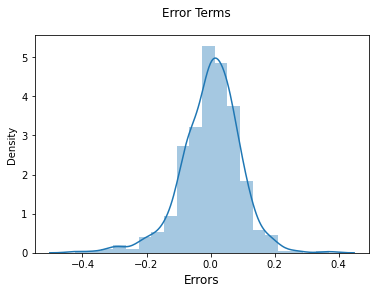

In [106]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 12)
plt.xlabel('Errors', fontsize = 12)

#### From the above it is clear that the errors terms are distributed normally with a mean of '0'. 
#### The assumption of linear regression is satisfied.

#### Lets test on test data.

#### Scaling on test data.

In [107]:
num_vars = ['temparature', 'humidity', 'windspeed', 'cnt']
Bike_test[num_vars] = scaler.transform(Bike_test[num_vars])

#### Dividing X_test and y_test.

In [108]:
y_test = Bike_test.pop("cnt")
X_test = Bike_test

#### Similar to training data adding constant.

In [109]:
X_test_lm = X_test[X_train_1.columns]
X_test_lm = sm.add_constant(X_test_lm)
y_pred = lr_1.predict(X_test_lm)


Text(0, 0.5, 'y_pred')

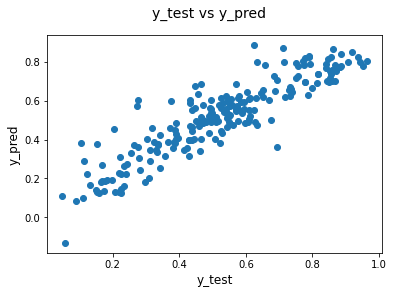

In [110]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=14)              
plt.xlabel('y_test', fontsize=12)                        
plt.ylabel('y_pred', fontsize=12) 

#### The above graph shows that the predicted values have linear relationship with actual values.

#### Lets calulate the R sqaure value of test set.

In [197]:
r2 = r2_score(y_test, y_pred)
r2

0.8070101019557963

#### Adjusted R-Sqaure

In [198]:
n = X_test_lm.shape[0]
p = X_test_lm.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7967546001273603

### Train Set:
#### R-Square - 83.3%
#### Adjusted R-Square - 83%


### Test Set:
#### R-Square - 80%
#### Adjusted R-Square - 79%

#### The coefficients of independent variables for best  line fit with respect to dependent variables are as follows.

$ cnt(demand) = -0.098  \times  holiday + 0.4515  \times  temparature - 0.1398 \times windspeed - 0.1108 \times Season spring + 0.0473 \times Season winter - 0.0811 \times Weather cloudy - 0.2864 \times Weather light rain - 0.0727 \times Month july + 0.0577 \times Month September + 0.2341 \times Year 2019 $

#### We can also built the model using RFE(Recursive Feature Elimination) in case we have more number of features. We can also have that kind of approach to solve this problem.